Class Distribution Before Balancing:
 label
Dyskeratotic                2000
Metaplastic                 2000
Koilocytotic                2000
Parabasal                   2000
Superficial-Intermediate    2000
Name: count, dtype: int64
Class Distribution After Balancing:
 label
Dyskeratotic                2000
Koilocytotic                2000
Metaplastic                 2000
Parabasal                   2000
Superficial-Intermediate    2000
Name: count, dtype: int64
Found 8000 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.
Epoch 1/10


I0000 00:00:1745492013.682092 1636282 service.cc:148] XLA service 0x7f7068003000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745492013.682138 1636282 service.cc:156]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2025-04-24 10:53:33.921662: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745492015.233999 1636282 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-24 10:53:35.562633: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


  1/250 ━━━━━━━━━━━━━━━━━━━━ 49:23 12s/step - accuracy: 0.1875 - loss: 2.8590

I0000 00:00:1745492019.337453 1636282 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.7761 - loss: 0.7838

2025-04-24 10:55:09.529091: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1718', 8 bytes spill stores, 8 bytes spill loads



250/250 ━━━━━━━━━━━━━━━━━━━━ 117s 422ms/step - accuracy: 0.7764 - loss: 0.7826 - val_accuracy: 0.9520 - val_loss: 0.1257 - learning_rate: 1.0000e-04
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 391ms/step - accuracy: 0.9243 - loss: 0.2317 - val_accuracy: 0.9750 - val_loss: 0.0852 - learning_rate: 1.0000e-04
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 391ms/step - accuracy: 0.9532 - loss: 0.1424 - val_accuracy: 0.9850 - val_loss: 0.0441 - learning_rate: 1.0000e-04
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 391ms/step - accuracy: 0.9607 - loss: 0.1230 - val_accuracy: 0.9860 - val_loss: 0.0394 - learning_rate: 1.0000e-04
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 392ms/step - accuracy: 0.9751 - loss: 0.0837 - val_accuracy: 0.9900 - val_loss: 0.0280 - learning_rate: 1.0000e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 390ms/step - accuracy: 0.9758 - loss: 0.0837 - val_accuracy: 0.9950 - val_loss: 0.0174 - learning_rate: 1.0000e-04
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 97s 387ms/step -

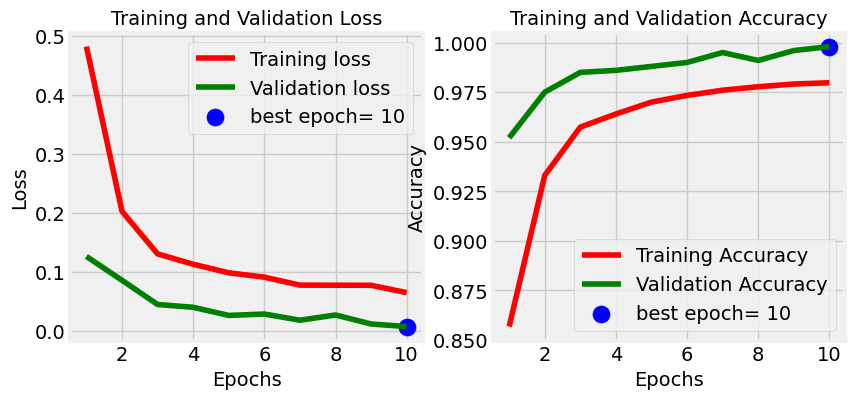

Number of duplicates in new test data: 0
New Test Data Class Distribution:
 label
Koilocytotic                100
Parabasal                   100
Metaplastic                 100
Dyskeratotic                100
Superficial-Intermediate    100
Name: count, dtype: int64
Found 500 validated image filenames belonging to 5 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 869ms/step - accuracy: 0.9114 - loss: 0.6420
New Test Loss: 0.893716
New Test Accuracy: 89%
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 907ms/step


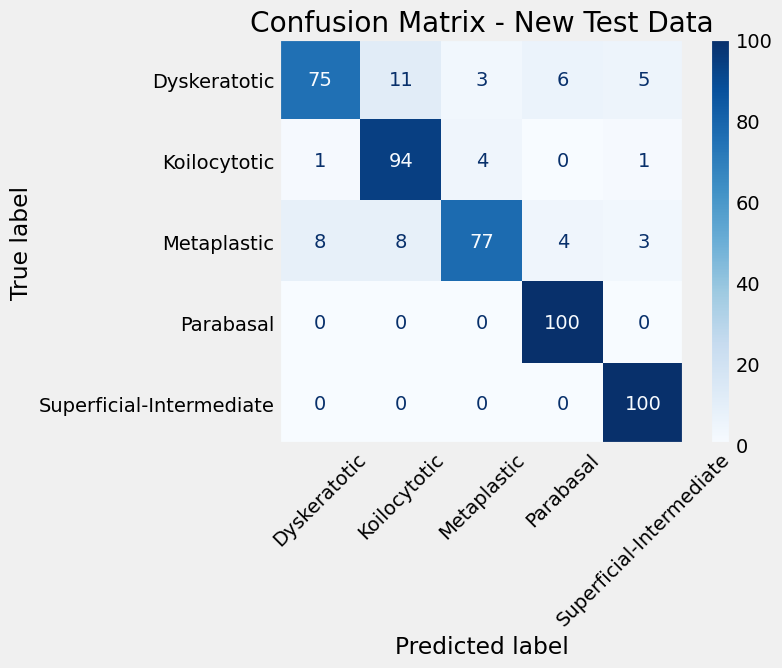


Classification Report - New Test Data:
                          precision    recall  f1-score   support

            Dyskeratotic       0.89      0.75      0.82       100
            Koilocytotic       0.83      0.94      0.88       100
             Metaplastic       0.92      0.77      0.84       100
               Parabasal       0.91      1.00      0.95       100
Superficial-Intermediate       0.92      1.00      0.96       100

                accuracy                           0.89       500
               macro avg       0.89      0.89      0.89       500
            weighted avg       0.89      0.89      0.89       500



In [2]:
import os
import warnings
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

warnings.filterwarnings("ignore")

# Function to load data from directory
def load_data(directory):
    file_paths = []
    labels = []
    class_folders = os.listdir(directory)
    for class_folder in class_folders:
        class_folder_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_folder_path):
            files = os.listdir(class_folder_path)
            for file in files:
                file_paths.append(os.path.join(class_folder_path, file))
                labels.append(class_folder)
    return pd.DataFrame({"file_path": file_paths, "label": labels})

# Load original dataset
main_dir_path = "./dataset_split2/"
file_paths = []
labels = []
folders = os.listdir(main_dir_path)

for subfolder in ["test", "train", "val"]:
    subfolder_path = os.path.join(main_dir_path, subfolder)
    class_folders = os.listdir(subfolder_path)
    for class_folder in class_folders:
        class_folder_path = os.path.join(subfolder_path, class_folder)
        files = os.listdir(class_folder_path)
        for file in files:
            file_paths.append(os.path.join(class_folder_path, file))
            labels.append(class_folder)

df = pd.DataFrame({"file_path": file_paths, "label": labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Balance dataset
class_counts = df["label"].value_counts()
print("Class Distribution Before Balancing:\n", class_counts)
min_samples = class_counts.min()
balanced_df = df.groupby("label").apply(lambda x: x.sample(min_samples, random_state=42)).reset_index(drop= True)
print("Class Distribution After Balancing:\n", balanced_df["label"].value_counts())

# Split dataset
train_df, tv_df = train_test_split(balanced_df, test_size=0.2, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(tv_df, test_size=0.5, shuffle=True, random_state=42)

# Define constants
K = df.label.nunique()
IMG_SIZE = (224, 224)
CHANNELS = 3
IMG_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], CHANNELS)
TRAIN_VALID_BATCH_SIZE = 32
test_length = len(test_df)
TEST_BATCH_SIZE = max(sorted([test_length // n for n in range(1, test_length + 1) if test_length % n == 0 and test_length / n <= 80]))

# Data augmentation
gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

train_gen = gen.flow_from_dataframe(
    train_df, x_col="file_path", y_col="label", shuffle=True, target_size=IMG_SIZE,
    batch_size=TRAIN_VALID_BATCH_SIZE, class_mode='categorical'
)
valid_gen = gen.flow_from_dataframe(
    valid_df, x_col="file_path", y_col="label", shuffle=True, target_size=IMG_SIZE,
    batch_size=TRAIN_VALID_BATCH_SIZE, class_mode='categorical'
)
test_gen = gen.flow_from_dataframe(
    test_df, x_col="file_path", y_col="label", shuffle=False, target_size=IMG_SIZE,
    batch_size=TEST_BATCH_SIZE, class_mode='categorical'
)

# Build model
base_model = ResNet50(input_shape=IMG_SHAPE, weights="imagenet", include_top=False)
base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(K, activation="softmax")
])

# Compile and train
optimizer = Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
]

r = model.fit(train_gen, epochs=10, validation_data=valid_gen, callbacks=callbacks, shuffle=False)

# Plot training history
tr_acc = r.history['accuracy']
tr_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
best_loss_index = np.argmin(val_loss)
val_lowest = val_loss[best_loss_index]
best_train_acc_index = np.argmax(val_acc)
acc_highest = val_acc[best_train_acc_index]
epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(best_loss_index + 1)}'
acc_label = f'best epoch= {str(best_train_acc_index + 1)}'

plt.figure(figsize=(10, 4))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.scatter(best_loss_index + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(best_train_acc_index + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

# Load and test new dataset
new_test_dir = "./balanced2"
new_test_df = load_data(new_test_dir)
new_test_df['hash'] = new_test_df['file_path'].apply(lambda x: hashlib.md5(open(x, 'rb').read()).hexdigest())
print("Number of duplicates in new test data:", new_test_df['hash'].duplicated().sum())
new_test_df = new_test_df.drop_duplicates(subset='hash').drop(columns='hash')
print("New Test Data Class Distribution:\n", new_test_df["label"].value_counts())

if set(new_test_df['label'].unique()) != set(train_gen.class_indices.keys()):
    raise ValueError("Class labels in new test data do not match training data classes.")

new_test_gen = gen.flow_from_dataframe(
    new_test_df, x_col="file_path", y_col="label", target_size=IMG_SIZE,
    batch_size=TEST_BATCH_SIZE, class_mode="categorical", shuffle=False, seed=42
)

new_test_length = len(new_test_df)
new_test_steps = ceil(new_test_length / TEST_BATCH_SIZE)
new_test_score = model.evaluate(new_test_gen, steps=new_test_steps)
print(f"New Test Loss: {new_test_score[0]:.6f}")
print(f"New Test Accuracy: {round(new_test_score[1]*100)}%")

y_pred_new = np.argmax(model.predict(new_test_gen, steps=new_test_steps), axis=1)
y_true_new = new_test_gen.classes
cm_new = confusion_matrix(y_true_new, y_pred_new)
disp_new = ConfusionMatrixDisplay(cm_new, display_labels=list(new_test_gen.class_indices.keys()))

plt.figure(figsize=(6, 5))
ax = plt.gca()  # Get current axes
disp_new.plot(cmap="Blues", xticks_rotation=45, ax=ax)
ax.grid(False)  # Disable grid
plt.title("Confusion Matrix - New Test Data")
plt.show()


print("\nClassification Report - New Test Data:")
print(classification_report(y_true_new, y_pred_new, target_names=list(new_test_gen.class_indices.keys())))

# Test original test data
# test_steps = ceil(test_length / TEST_BATCH_SIZE)
# test_score = model.evaluate(test_gen, steps=test_steps)
# print(f"Original Test Loss: {test_score[0]:.6f}")
# print(f"Original Test Accuracy: {round(test_score[1]*100)}%")

# Yhat = np.argmax(model.predict(test_gen, steps=test_steps), axis=1)
# Ytrue = test_gen.classes
# cm = confusion_matrix(Ytrue, Yhat)
# disp = ConfusionMatrixDisplay AscentDisplay(cm, display_labels=list(test_gen.class_indices.keys()))

# fig, ax = plt.subplots(figsize=(10, 8))
# disp.plot(cmap="Blues", ax=ax)
# ax.grid(False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.title("Confusion Matrix - Original Test Data")
# plt.show()

# print("\nClassification Report - Original Test Data:")
# print(classification_report(Ytrue, Yhat, target_names=list(test_gen.class_indices.keys())))

In [3]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,679,057 (384.06 MB)

 Trainable params: 25,695,749 (98.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

 Optimizer params: 51,391,500 (196.04 MB)

In [4]:
import numpy as np
tr_acc = r.history['accuracy']
tr_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
best_loss_index = np.argmin(val_loss)
val_lowest = val_loss[best_loss_index]
best_train_acc_index = np.argmax(val_acc)
acc_highest = val_acc[best_train_acc_index]
epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(best_loss_index + 1)}'
acc_label = f'best epoch= {str(best_train_acc_index + 1)}'

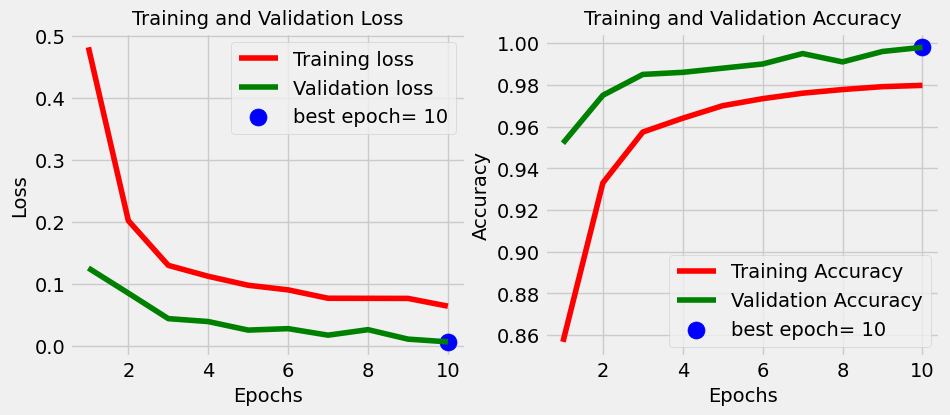

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 4))
plt.style.use('fivethirtyeight')

# Plot training and validation losses 
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(best_loss_index + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(best_train_acc_index + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend();

In [8]:
test_length = len(new_test_df)
steps = test_length // TEST_BATCH_SIZE
test_score = model.evaluate(new_test_gen, steps=new_test_steps)

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9166 - loss: 0.6078


In [9]:
print(f"Test loss: {test_score[0]: .06f}")
print(f"Test accuracy: {round(test_score[1]*100)}%") 

Test loss:  0.942220
Test accuracy: 90%


In [11]:
Yhat = np.argmax(model.predict(new_test_gen), axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 992ms/step


In [12]:
Ytrue = new_test_gen.classes
labels = list(new_test_gen.class_indices.keys())

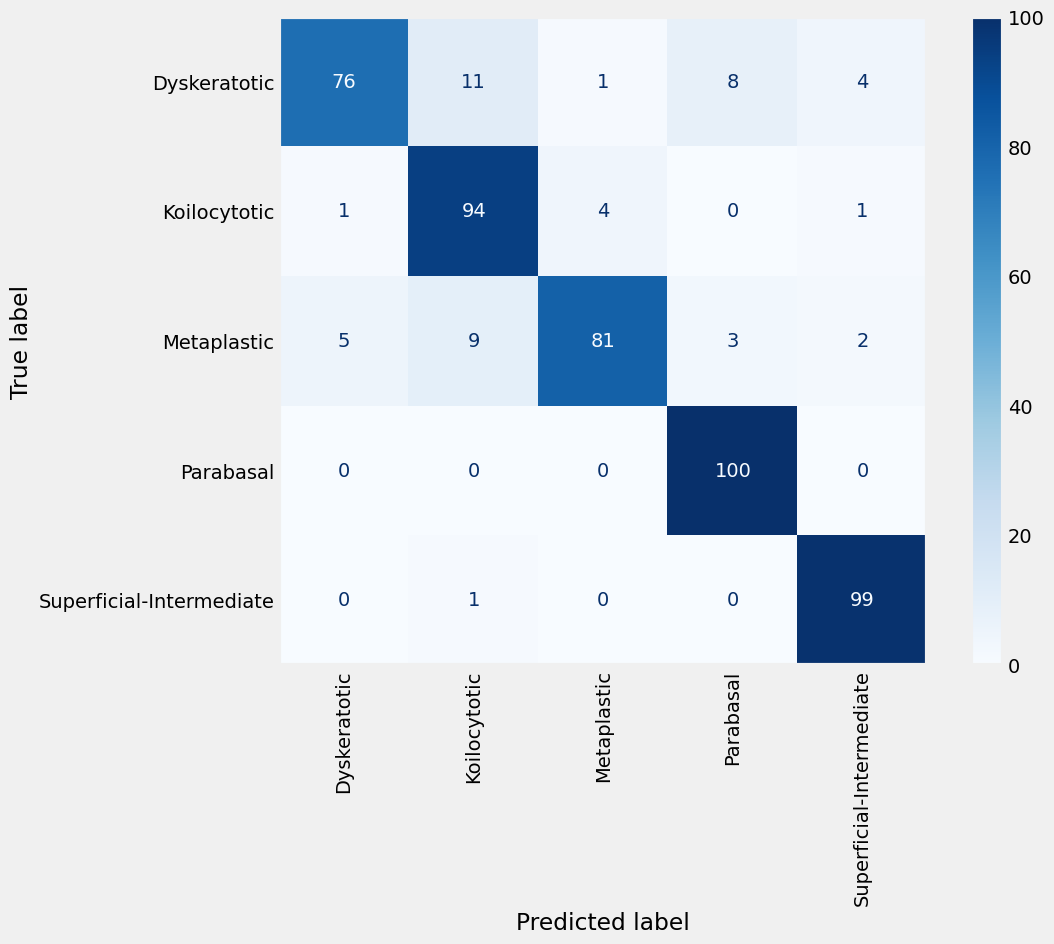

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_true=np.array(Ytrue).flatten(), y_pred=Yhat.flatten())
fig, ax = plt.subplots(figsize=(10, 8))

display = ConfusionMatrixDisplay(cm, display_labels=test_gen.class_indices)
im = display.plot(cmap="Blues", ax=ax)

# Access the underlying imshow object and set grid to False
im.im_.axes.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.savefig('confusion_matrix.png')
plt.show()

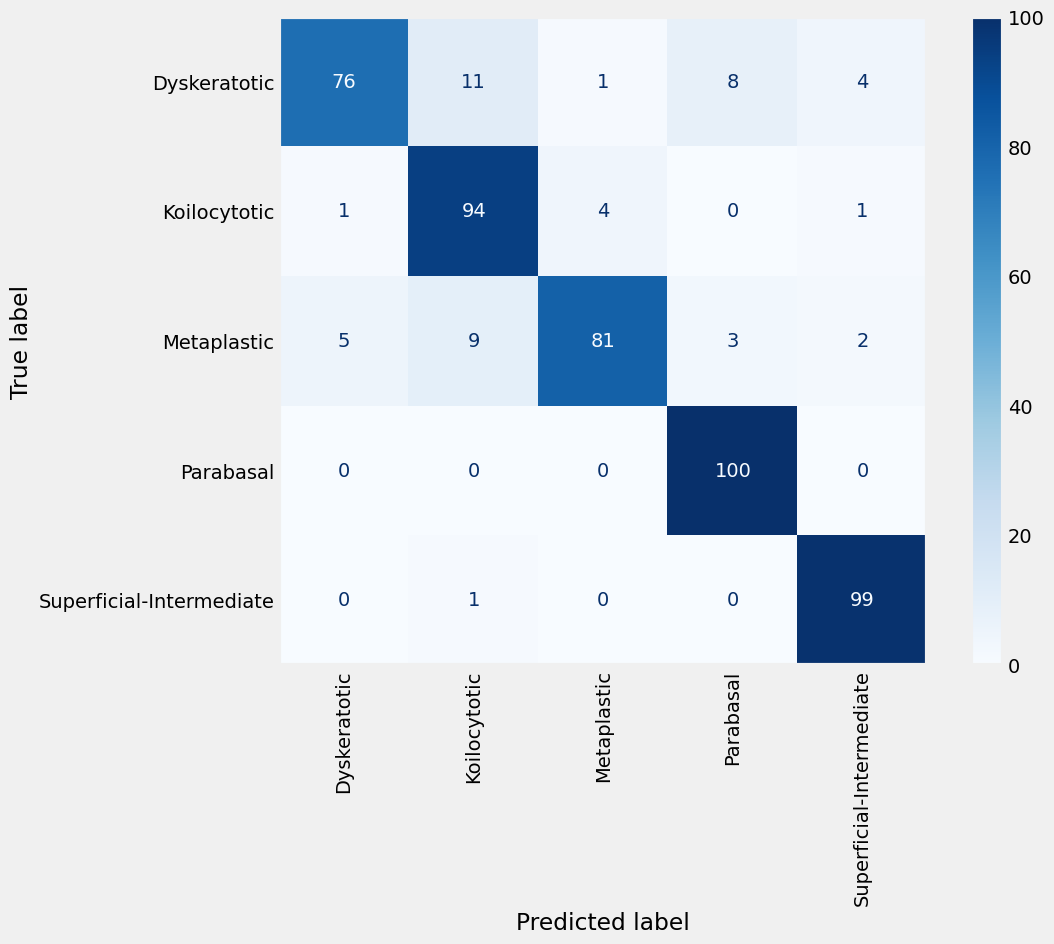

In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_true=np.array(Ytrue).flatten(), y_pred=Yhat.flatten())

# Convert counts to percentages
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
fig, ax = plt.subplots(figsize=(10, 8))
display = ConfusionMatrixDisplay(cm_percentage, display_labels=test_gen.class_indices)
im =display.plot(cmap="Blues", ax=ax, values_format='.0f')  # Use values_format to show integers

im.im_.axes.grid(False)
# Set labels orientation to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [15]:
print(classification_report(y_true=Ytrue, y_pred=Yhat, target_names=labels))

                          precision    recall  f1-score   support

            Dyskeratotic       0.93      0.76      0.84       100
            Koilocytotic       0.82      0.94      0.87       100
             Metaplastic       0.94      0.81      0.87       100
               Parabasal       0.90      1.00      0.95       100
Superficial-Intermediate       0.93      0.99      0.96       100

                accuracy                           0.90       500
               macro avg       0.90      0.90      0.90       500
            weighted avg       0.90      0.90      0.90       500



In [16]:
model.save("ResNet_cervical_diagnosis.keras")